<a href="https://colab.research.google.com/github/Sujin6614/Big_Data/blob/main/database_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=35c96fb9eec7e15b1845cdaaafeb62daa4fec20d4e452680c03b3916c2a7741f
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import  when, trim
from pyspark.context import SparkContext
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
spark=SparkSession.builder.appName("Assignment").getOrCreate()

In [ ]:
df=spark.read.csv('/content/drive/MyDrive/big_data/dataset2.csv',header=True,inferSchema=True)

In [ ]:
df.show()

+---------+----+----+-------------------+------------------+-----+--------+----+-----+--------------------+
|       X1|  X2|  X3|                 X4|                X5|   X6|      X7|  X8|   X9|                 X10|
+---------+----+----+-------------------+------------------+-----+--------+----+-----+--------------------+
| 34811059|2.73| 0.1|  3.328944661018629|           24.5962|12314|129.9049|75.3| 29.5|Middle East & Nor...|
| 19842251|6.43| 2.0| 1.4743533878509398|          22.25083| 7103|130.1247|58.3|192.0|  Sub-Saharan Africa|
| 40381860|2.24| 0.5|        4.785169983|           27.5017|14646|118.8915|75.5| 15.4|             America|
|  2975029| 1.4| 0.1|        1.804106217|          25.35542| 7383|132.8108|72.5| 20.0|Europe & Central ...|
| 21370348|1.96| 0.1|        18.01631327|          27.56373|41312|117.3755|81.5|  5.2| East Asia & Pacific|
|  8331465|1.41| 0.3|        8.183160018|          26.46741|43952|124.1394|80.4|  4.6|Europe & Central ...|
|  8868713|1.99| 0.1|       

In [ ]:
#removing the X10
df.drop('X10').show()

+---------+----+----+-------------------+------------------+-----+--------+----+-----+
|       X1|  X2|  X3|                 X4|                X5|   X6|      X7|  X8|   X9|
+---------+----+----+-------------------+------------------+-----+--------+----+-----+
| 34811059|2.73| 0.1|  3.328944661018629|           24.5962|12314|129.9049|75.3| 29.5|
| 19842251|6.43| 2.0| 1.4743533878509398|          22.25083| 7103|130.1247|58.3|192.0|
| 40381860|2.24| 0.5|        4.785169983|           27.5017|14646|118.8915|75.5| 15.4|
|  2975029| 1.4| 0.1|        1.804106217|          25.35542| 7383|132.8108|72.5| 20.0|
| 21370348|1.96| 0.1|        18.01631327|          27.56373|41312|117.3755|81.5|  5.2|
|  8331465|1.41| 0.3|        8.183160018|          26.46741|43952|124.1394|80.4|  4.6|
|  8868713|1.99| 0.1|        5.109538292|          25.65117|14365|128.6024|70.6| 43.3|
|   348587|1.89| 3.1|        3.131921321|          27.24594|24373|124.3862|72.2| 14.5|
|148252473|2.38|0.06|0.31916100201885805|  

In [ ]:
#creating Graph
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

In [ ]:
x2_x8_df = df.select('X2', 'X8')
x2_x8_rdd = x2_x8_df.rdd.map(lambda x: (x['X2'], x['X8']))
x2_values = x2_x8_rdd.map(lambda x: x[0]).collect()
x8_values = x2_x8_rdd.map(lambda x: x[1]).collect()

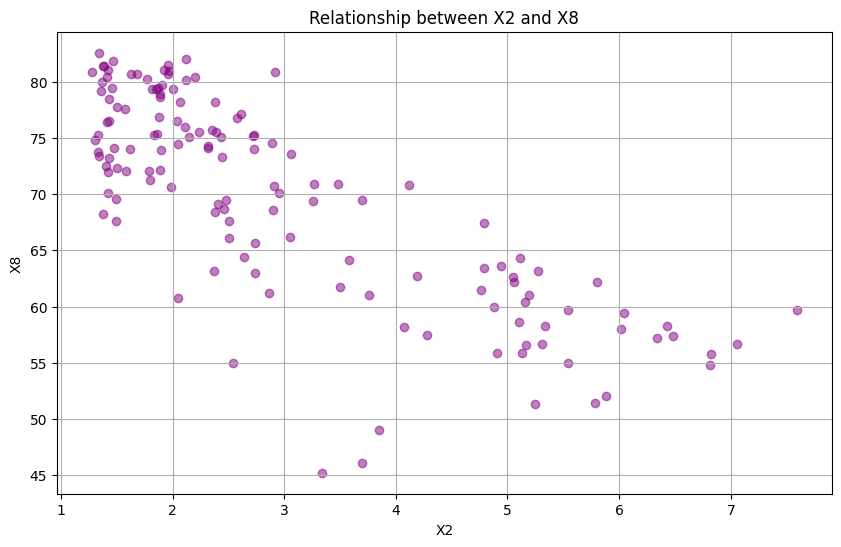

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x2_values, x8_values, color='purple', alpha=0.5)
plt.title('Relationship between X2 and X8')
plt.xlabel('X2')
plt.ylabel('X8')
plt.grid(True)
plt.show()

In [ ]:
#using Spark SQL
df.createOrReplaceTempView("data")
result = spark.sql("""
    SELECT X2, X8
    FROM data
    WHERE X2 > 1.0 AND X8 > 70
""")

In [ ]:
result.show()

+----+----+
|  X2|  X8|
+----+----+
|2.73|75.3|
|2.24|75.5|
| 1.4|72.5|
|1.96|81.5|
|1.41|80.4|
|1.99|70.6|
|1.89|72.2|
|1.83|75.3|
|1.42|70.1|
|1.82|79.4|
|2.91|70.7|
|3.48|70.9|
| 1.9|73.9|
|1.43|73.2|
|1.68|80.7|
|1.89|78.9|
|2.43|75.1|
|1.91|79.7|
|1.43|76.5|
| 1.5|77.8|
+----+----+
only showing top 20 rows



In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

In [ ]:
# Prepareing the data of:  'X2' and 'X8' columns

In [ ]:
data = df.select('X2', 'X8')

In [ ]:
# Spliting the data into training and testing sets

In [ ]:
train, test = data.randomSplit([0.7, 0.3])

In [ ]:
# Defineing the vector assembler

In [ ]:
assembler = VectorAssembler(inputCols=['X2'], outputCol='features')

In [ ]:
# Transforming the data using  vector assembler

In [ ]:
train = assembler.transform(train)
test = assembler.transform(test)

In [ ]:
# Defining the linear regression model

In [ ]:
lr = LinearRegression(featuresCol='features', labelCol='X8')

In [ ]:
# Training the model using  training data

In [ ]:
lr_model = lr.fit(train)

In [ ]:
# Makeing predictions on the testing data

In [ ]:
predictions = lr_model.transform(test)

In [ ]:
# Evaluateing the model's performance

In [ ]:
evaluator = RegressionEvaluator(labelCol='X8', predictionCol='prediction', metricName='rmse')
rmse = evaluator.evaluate(predictions)

In [ ]:
# Printing the root mean squared error (RMSE)

In [ ]:
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 5.99748832667019


In [ ]:
# Defining the features excluding X8 and the target column
feature_column = ['X1','X2','X3','X4','X5','X6','X7','X9']
target_column = 'X8'

In [ ]:
#Defining the predictor
predictors = [col for col in feature_column if col != target_column]

In [ ]:
#Create a vector assembler to combine all the feature columns
assembler = VectorAssembler(inputCols = feature_column,outputCol='features')
#Define the vector assembler
assembler = VectorAssembler(inputCols=predictors,outputCol='features')


In [ ]:
#Apply the vector assembler to the DataFrame
assembled_data = assembler.transform(df)

In [ ]:
# Split the data into training and test sets
train,test = assembled_data.randomSplit([0.7,0.3])


In [ ]:
#Check if X8 exists in the train dataframe
if 'X8' not in train.columns:
    raise ValueError("Column X8 does not exist in the train DataFrame.")
# Check if 'X8' exists in the test DataFrame
if 'X8' not in test.columns:
    raise ValueError("Column 'X8' does not exist in the test DataFrame.")

In [ ]:
# Define the Lasso regression model
lasso = LinearRegression(featuresCol='features', labelCol=target_column, elasticNetParam=1.0, regParam=0.1)
# Train the model using the training data
lasso_model = lasso.fit(train)

In [ ]:
# Make predictions on the testing data
predictions = lasso_model.transform(test)
# Evaluate the model's performance
evaluator = RegressionEvaluator(labelCol=target_column, predictionCol='prediction', metricName='rmse')
rmse = evaluator.evaluate(predictions)

In [ ]:
# Print the lasso regression (RMSE)
print("Lasso Regression:", rmse)

Lasso Regression: 3.0510669205564667
